In [ ]:
import numpy as np 
import keras,os
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
IMAGE_SIZE = 224
classes = 2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls '/content/drive'

MyDrive


In [ ]:
#Give dataset path
train_path = '/content/drive/MyDrive/datasets/train'
test_path = '/content/drive/MyDrive/datasets/testing'

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=5,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        fill_mode="nearest")

train_generator = train_datagen.flow_from_directory(
          '/content/drive/MyDrive/datasets/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="sparse")

Found 500 images belonging to 2 classes.


In [ ]:
class_name = list(train_generator.class_indices.keys())
class_name

['cars', 'motorcyle']

In [ ]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range= 5,
        width_shift_range= 0.1,
        height_shift_range= 0.1, 
        horizontal_flip= True,
        fill_mode= "nearest")

test_generator = test_datagen.flow_from_directory(
          '/content/drive/MyDrive/datasets/testing',
        target_size= (IMAGE_SIZE, IMAGE_SIZE), class_mode="sparse")

Found 8 images belonging to 2 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(224, 224, 3), filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [ ]:
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))

In [ ]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [ ]:
train_data = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 500 images belonging to 2 classes.


In [ ]:
test_data = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 8 images belonging to 2 classes.


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit_generator(steps_per_epoch=10,generator=train_data, validation_data= test_data, validation_steps=10,epochs=10,callbacks=[checkpoint,early])

<ipython-input-16-c05bb0f6c43c>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(steps_per_epoch=10,generator=train_data, validation_data= test_data, validation_steps=10,epochs=10,callbacks=[checkpoint,early])


Epoch 1/10
10/10 [==============================] - ETA: 0s - loss: 0.9530 - accuracy: 0.4643  

10/10 [==============================] - 645s 63s/step - loss: 0.9530 - accuracy: 0.4643 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 2/10
10/10 [==============================] - ETA: 0s - loss: 0.6955 - accuracy: 0.4781  

10/10 [==============================] - 650s 65s/step - loss: 0.6955 - accuracy: 0.4781
Epoch 3/10
10/10 [==============================] - ETA: 0s - loss: 0.6940 - accuracy: 0.4935  

10/10 [==============================] - 621s 62s/step - loss: 0.6940 - accuracy: 0.4935
Epoch 4/10
10/10 [==============================] - ETA: 0s - loss: 0.6937 - accuracy: 0.4906  

10/10 [==============================] - 643s 64s/step - loss: 0.6937 - accuracy: 0.4906
Epoch 5/10
10/10 [==============================] - ETA: 0s - loss: 0.6927 - accuracy: 0.5195  

10/10 [==============================] - 619s 62s/step - loss: 0.6927 - accuracy: 0.5195
Epoch 6/10
10/10 [==============================] - ETA: 0s - loss: 0.6960 - accuracy: 0.4812  

10/10 [==============================] - 646s 65s/step - loss: 0.6960 - accuracy: 0.4812
Epoch 7/10
10/10 [==============================] - ETA: 0s - loss: 0.6938 - accuracy: 0.4875  

10/10 [==============================] - 623s 62s/step - loss: 0.6938 - accuracy: 0.4875
Epoch 8/10
10/10 [==============================] - ETA: 0s - loss: 0.6933 - accuracy: 0.5162 

10/10 [==============================] - 598s 59s/step - loss: 0.6933 - accuracy: 0.5162
Epoch 9/10
10/10 [==============================] - ETA: 0s - loss: 0.6933 - accuracy: 0.5292 

10/10 [==============================] - 596s 59s/step - loss: 0.6933 - accuracy: 0.5292
Epoch 10/10
10/10 [==============================] - ETA: 0s - loss: 0.6936 - accuracy: 0.5000  

10/10 [==============================] - 617s 62s/step - loss: 0.6936 - accuracy: 0.5000


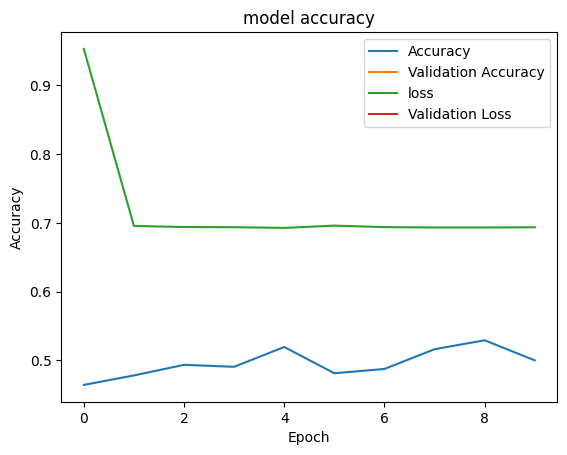

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 1s 958ms/step


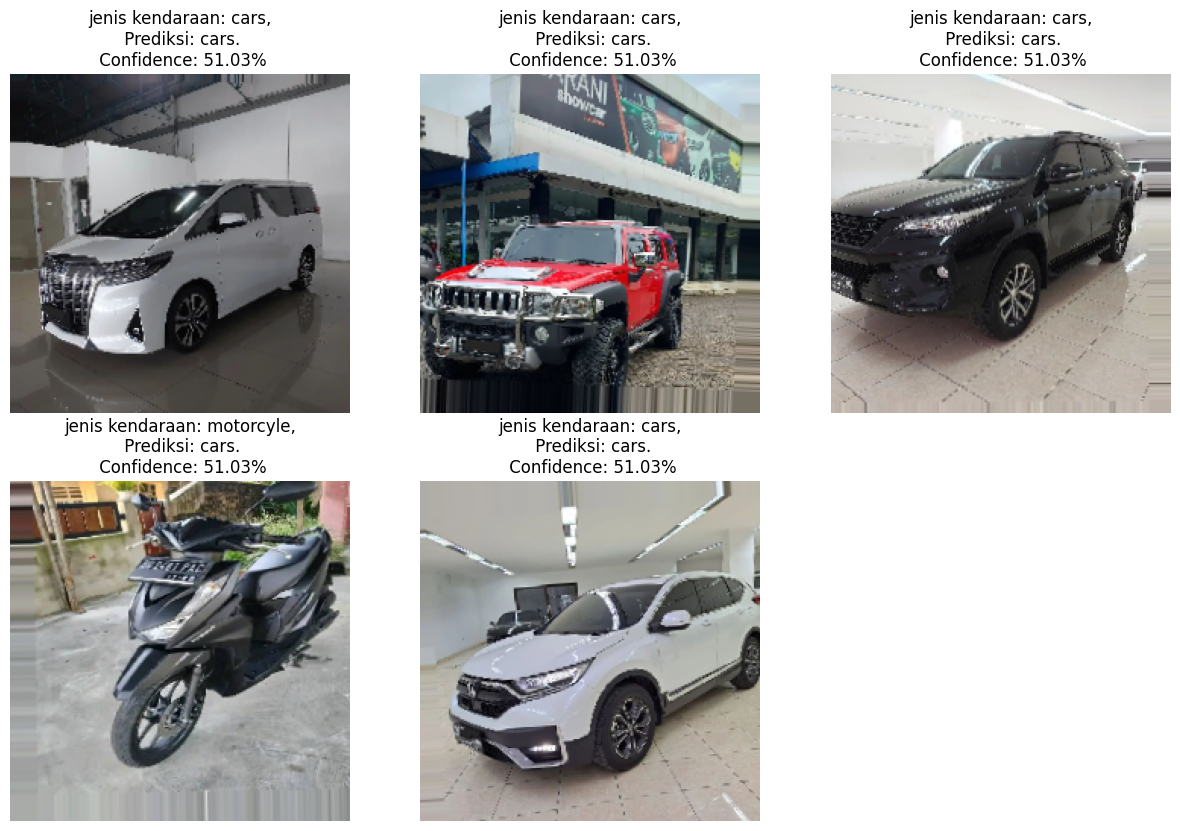

In [ ]:
plt.figure(figsize=(15, 15))

for images, labels in test_generator:
    for i in range(5):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_name[int(labels[i])] 
        plt.title(f"jenis kendaraan: {actual_class},\n Prediksi: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")
    break

In [2]:
import numpy as np 
import keras,os
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.preprocessing.image import ImageDataGenerator

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Membuat objek model
model = Sequential()

# Menambahkan blok-blok konvolusi
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Konversi matriks fitur menjadi vektor
model.add(Flatten())

# Menambahkan layer-layer fully connected
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#Give dataset path
train_path = '/content/drive/MyDrive/datasets/train'
test_path = '/content/drive/MyDrive/datasets/testing'

In [7]:
gen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=(0.8, 1.2),
    validation_split=0.2
)



train_ds=gen.flow_from_directory(
    train_path,
    class_mode='categorical',
    shuffle=True,
    batch_size=32,
    target_size=(244,244),
    subset="training"
)

validation_ds=gen.flow_from_directory(
    train_path,
    class_mode='categorical',
    shuffle=True,
    batch_size=32,
    target_size=(244,244),
    subset="validation"
)

Found 400 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [8]:
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
model.fit(
    train_ds,
    steps_per_epoch=train_ds.samples // train_ds.batch_size,
    validation_data=validation_ds,
    validation_steps=validation_ds.samples // validation_ds.batch_size,
    epochs=10,
    verbose=1)

Epoch 1/10
12/12 [==============================] - 198s 15s/step - loss: 197.1630 - accuracy: 0.4864 - val_loss: 0.6934 - val_accuracy: 0.4792
Epoch 2/10
12/12 [==============================] - 10s 848ms/step - loss: 0.7648 - accuracy: 0.5027 - val_loss: 0.6971 - val_accuracy: 0.4792
Epoch 3/10
12/12 [==============================] - 11s 875ms/step - loss: 0.6960 - accuracy: 0.5163 - val_loss: 0.6907 - val_accuracy: 0.5312
Epoch 4/10
12/12 [==============================] - 12s 958ms/step - loss: 0.6945 - accuracy: 0.5054 - val_loss: 0.6902 - val_accuracy: 0.5000
Epoch 5/10
12/12 [==============================] - 11s 889ms/step - loss: 0.6891 - accuracy: 0.5163 - val_loss: 0.6916 - val_accuracy: 0.4896
Epoch 6/10
12/12 [==============================] - 11s 860ms/step - loss: 0.6900 - accuracy: 0.5163 - val_loss: 0.6946 - val_accuracy: 0.5000
Epoch 7/10
12/12 [==============================] - 11s 894ms/step - loss: 0.6948 - accuracy: 0.4974 - val_loss: 0.6938 - val_accuracy: 0.500

In [16]:
model.save('model_vehicle.h5')

1/1 [==============================] - 0s 137ms/step
Prediksi: Cars
Predicted probability: 0.5041559338569641


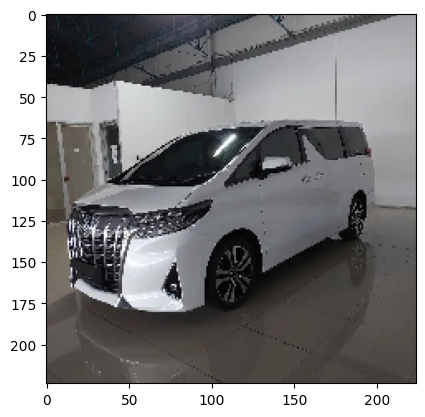

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the image
img_path = "/content/drive/MyDrive/datasets/testing/cars/1.jpg"
img = image.load_img(img_path, target_size=(224, 224))
img = image.img_to_array(img)
plt.imshow(img.astype(np.uint8))

# Preprocess the image
img = img / 255.0  # Normalize the pixel values
img = np.expand_dims(img, axis=0)  # Add the batch dimension

# Load the model
saved_model = load_model("model_vehicle.h5")

# Make prediction
output = saved_model.predict(img)

# Define the class labels
class_labels = ['motorcyle', 'Cars']

# Print the predicted class
predicted_class_idx = np.argmax(output)
predicted_class = class_labels[predicted_class_idx]
print(f"Prediksi: {predicted_class}")
print(f"Predicted probability: {output[0][predicted_class_idx]}")